In [13]:
import numpy as np
from sklearn.decomposition import PCA

# EX2

In [8]:
class PCA:
    def __init__(self,n_components):
        self.n_components = n_components
        self.mean = None
    def fit(self,X):
        #mean centering
        self.mean = np.mean(X, axis= 0)
        X = X - self.mean
        
        #covariance, function needs sample as columns
        cov = np.cov(X.T)
         
        #eigenvectors, eigenvalues
        eigenvectors, eigenvalues = np.linalg.eig(cov)
        
        #eigenvectorv = [:,i] column vector, transpose this for easier calculations
        eigenvectors = eigenvectors.T
        
        #sort eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        self.components = eigenvectors[:self.n_components]
        
    def transform(self,X):
        #projects data
        X = X - self.mean
        return np.dot(X,self.components.T)
    
    def explained_variance(self):
        variance_explained = []
        for i in self.eigenvalues:
            variance_explained.append((i/sum(self.eigenvalues)))
        return variance_explained

# EX3

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


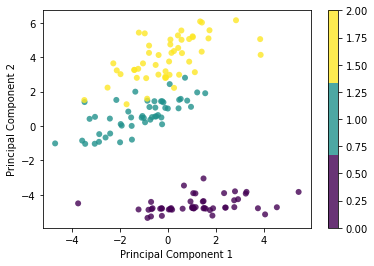

In [9]:
import matplotlib.pyplot as plt
from sklearn import datasets

# data = datasets.load_digits()
data = datasets.load_iris()
X = data.data
y = data.target

# Project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

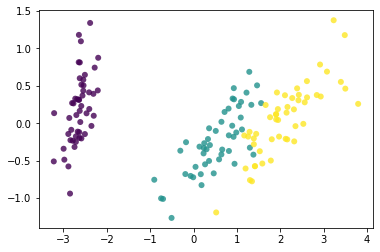

In [11]:



pca = PCA(n_components=2)
components = pca.fit_transform(X)

# components
plt.scatter(components[:, 0], components[:, 1], c=y, edgecolor="none", alpha=0.8)
plt.show()

Text(0, 0.5, 'cumulative explained variance')

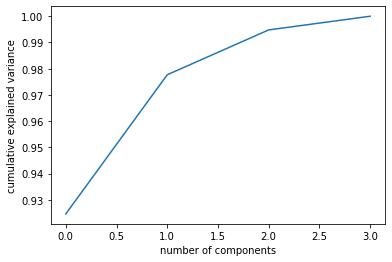

In [12]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# EX4